In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [39]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [40]:
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


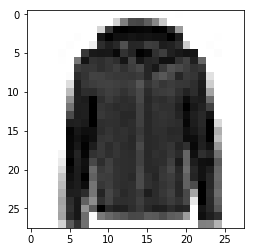

In [41]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

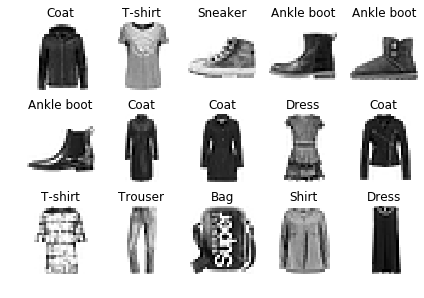

In [42]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [71]:
#创建模型
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# reason for sparse: y->index. y->one_hot->[] 
#这里使用sparse的原因是标签是一个数，所以用sparse，否则如果标签是向量只要categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics = ["accuracy"])

In [72]:
#查看模型
model.layers

In [73]:
#查看模型
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_28 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [74]:
#参数的个数是怎么计算的
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [75]:
#训练数据
#validation_data指定验证集
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 109us/sample - loss: 2.6456 - accuracy: 0.7641 - val_loss: 0.6565 - val_accuracy: 0.7920
Epoch 2/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.5556 - accuracy: 0.8145 - val_loss: 0.5642 - val_accuracy: 0.8032
Epoch 3/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4999 - accuracy: 0.8277 - val_loss: 0.5297 - val_accuracy: 0.8344
Epoch 4/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4688 - accuracy: 0.8379 - val_loss: 0.5072 - val_accuracy: 0.8306
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4347 - accuracy: 0.8468 - val_loss: 0.4498 - val_accuracy: 0.8454
Epoch 6/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4034 - accuracy: 0.8579 - val_loss: 0.3853 - val_accuracy: 0.8622
Epoch 7/10
55000/55000 [=============================

In [76]:
type(history)

tensorflow.python.keras.callbacks.History

In [77]:
#history.history值是训练过程中存储的指标
history.history

{'loss': [2.645552546553178,
  0.5556093565333974,
  0.49993480615832586,
  0.4687614223957062,
  0.43473075836355035,
  0.4034217724084854,
  0.3855562002355402,
  0.37054444025646555,
  0.36262617399259045,
  0.3505644718950445],
 'accuracy': [0.7641091,
  0.81445456,
  0.8277091,
  0.8378909,
  0.8467636,
  0.85792726,
  0.86303633,
  0.8687091,
  0.87203634,
  0.87552726],
 'val_loss': [0.6564606748580932,
  0.5641546386241912,
  0.5296854555606842,
  0.5072019151329994,
  0.44983958888053893,
  0.38532289022803307,
  0.41405314618349076,
  0.40067693154811856,
  0.39816217062473297,
  0.3949847837328911],
 'val_accuracy': [0.792,
  0.8032,
  0.8344,
  0.8306,
  0.8454,
  0.8622,
  0.8632,
  0.8644,
  0.8684,
  0.872]}

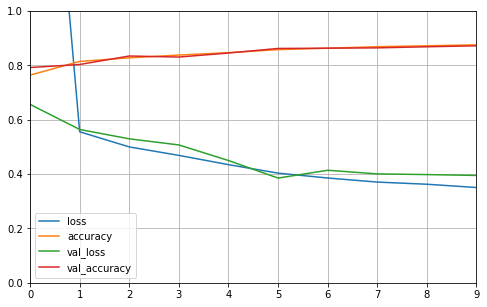

In [78]:
#打印指标图
def plot_learning_curves(history):
    # 把训练指标数据转成 pd.DataFrame 格式
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    # 显示网格
    plt.grid(True)
    # 设置坐标轴范围
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)


In [79]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.43157073481082914, 0.8539]